# Documentación de librerías usadas

* pandas: https://pypi.org/project/pandas/

Propósito: Manipulación y análisis de datos estructurados.
Uso: Para cargar y manipular los datos de entrada en forma de DataFrames, lo que facilita el manejo de grandes conjuntos de datos.

* numpy: https://pypi.org/project/numpy/

Propósito: Operaciones matemáticas y manejo de arrays.
Uso: Se utiliza principalmente para realizar operaciones numéricas eficientes sobre arrays multidimensionales.

* scipy.stats: https://docs.scipy.org/doc/scipy/tutorial/stats.html

Propósito: Proporciona herramientas estadísticas avanzadas.
Uso: Para calcular pruebas estadísticas y distribuciones, como el cálculo de valores p, tests de normalidad, etc.

* matplotlib.pyplot: https://matplotlib.org/stable/contents.html

Propósito: Visualización de datos en gráficos.
Uso: Genera gráficos como histogramas, gráficos de dispersión, líneas de regresión, y visualizaciones que facilitan la interpretación de los resultados.

* seaborn: https://seaborn.pydata.org/

Propósito: Biblioteca de visualización basada en Matplotlib, pero con estilos y funcionalidades avanzadas para gráficos estadísticos.
Uso: Para crear gráficos más estilizados y realizar análisis exploratorios con distribuciones, relaciones, y patrones.

* sklearn.preprocessing.StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Propósito: Normalización de los datos.
Uso: Para estandarizar los datos, es decir, escalar los datos para que tengan media 0 y desviación estándar 1, algo que es necesario antes de realizar análisis de regresión y otros modelos de Machine Learning.

* statsmodels.api: https://www.statsmodels.org/stable/index.html

Propósito: Proporciona herramientas para la estimación de modelos estadísticos, pruebas de hipótesis, y análisis.
Uso: Para ajustar modelos de regresión y calcular sus parámetros, tales como los coeficientes y p-valores.


In [157]:
# Import de las librerías necesarias
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Descripción del Dataset del Servidor**
Este dataset contiene información relacionada con las consultas ejecutadas en el servidor PostgreSQL, donde se evaluó el consumo energético bajo diferentes estrategias de optimización (indexación, compresión y combinaciones). A continuación, se describen las variables:


*   **query (int):** Número de la consulta del benchmark TPC-H, del 1 al 22.
*   **Iteration (int):** Número de la iteración de cada consulta (del 1 al 30), lo cual permite capturar el comportamiento energético en múltiples ejecuciones.

*   **--base Total Energy (J) (float):** Energía total consumida en joules sin aplicar ninguna optimización. Es la referencia base para comparar con las estrategias de optimización.
*   **index Total Energy (J) (float):** Energía total consumida en joules cuando se aplica solo la indexación. Esto permite evaluar el impacto energético de la indexación sobre la consulta.

*   **compression Total Energy (J) (float):** Energía total consumida en joules cuando solo se aplica la compresión de datos.
*   **index-and-compression Total Energy (J) (float):** Energía total consumida cuando se aplican simultáneamente indexación y compresión. Esta variable se utiliza para evaluar si la combinación de estrategias es más eficiente que cada una por separado.



In [158]:
# Cargar los datos del servidor
server_data = pd.read_csv('all-server_resume_iteration.csv')
server_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   query                                   660 non-null    int64  
 1   Iteration                               660 non-null    int64  
 2   --base Total Energy (J)                 660 non-null    float64
 3   index Total Energy (J)                  660 non-null    float64
 4   compression Total Energy (J)            660 non-null    float64
 5   index-and-compression Total Energy (J)  660 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 31.1 KB


# Descripción del Dataset del Cliente

In [159]:
client_data=pd.read_csv('all-client_resume_iteration.csv')
client_data

,query,Iteration,--base Juliet Java Total Energy (J),--base Total Energy (J),--base Average Energy (J),--base Total Power (W),--base Average Power (W),--base Runtime,--base Read Count,--base Postgres CPU %,...,compression Postgres Read Count,index-and-compression Juliet Java Total Energy (J),index-and-compression Total Energy (J),index-and-compression Average Energy (J),index-and-compression Total Power (W),index-and-compression Average Power (W),index-and-compression Runtime,index-and-compression Read Count,index-and-compression Postgres CPU %,index-and-compression Postgres Read Count
0,1,1,21.7749,13.1298,0.273538,0.5827,0.012140,41589354580,112.0,71.76,...,38870.99,21.0338,13.3582,0.333955,1.6220,0.040550,30846643180,112.0,99.23,107271.67
1,1,2,23.6804,12.2016,0.271147,0.1727,0.003838,25841325520,112.0,69.63,...,40560.68,23.4381,13.9155,0.296074,1.4173,0.030155,21187078549,112.0,0.00,0.00
2,1,3,25.1116,12.9996,0.259992,0.4585,0.009170,23625756545,112.0,71.75,...,40228.22,21.8224,12.7353,0.283007,1.1478,0.025507,20159461880,112.0,0.00,0.00
3,1,4,25.0316,10.6466,0.171719,0.8107,0.013076,24497828758,112.0,60.05,...,36864.27,25.2161,10.8845,0.253128,0.9846,0.022898,21192134977,112.0,0.00,0.00
4,1,5,20.0130,12.5769,0.292486,0.9260,0.021535,24209762836,112.0,71.22,...,39700.70,20.5399,13.3803,0.290876,0.7410,0.016109,20218967530,112.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,22,26,-2404.4300,12.0934,0.262900,0.6484,0.014096,360435951079,112.0,0.00,...,27.05,17.7020,26.0349,13.017450,26.0349,13.017450,8286380797,112.0,0.00,0.00
656,22,27,111.3760,12.9474,0.323685,0.6568,0.016420,339360821140,112.0,0.00,...,36.52,16.8539,31.9875,15.993750,31.9875,15.993750,8371370236,112.0,0.00,0.00
657,22,28,127.1810,12.7200,0.295814,0.4454,0.010358,403758743976,112.0,8.29,...,244256.94,16.0522,34.4829,0.313481,27.6328,0.251207,8283836734,112.0,0.00,0.00
658,22,29,112.3590,11.6654,0.271288,0.2586,0.006014,359958773648,112.0,0.00,...,34.83,16.3233,30.3229,7.580725,29.7637,7.440925,8291483814,112.0,0.00,0.00



El dataset a utilizar es all- client_resume_iteration.
Este dataset contiene los datos recopilados por un estudio que muestran los resultados del consumo energetico de distintas optimizaciones de consultas realizadas a una base de datos.

El dataset cuenta con 25.080 datos distribuidos en 660 filas y 38 columnas


In [160]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 38 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   query                                               660 non-null    int64  
 1   Iteration                                           660 non-null    int64  
 2   --base Juliet Java Total Energy (J)                 660 non-null    float64
 3   --base Total Energy (J)                             660 non-null    float64
 4   --base Average Energy (J)                           660 non-null    float64
 5   --base Total Power (W)                              660 non-null    float64
 6   --base Average Power (W)                            660 non-null    float64
 7   --base Runtime                                      660 non-null    int64  
 8   --base Read Count                                   660 non-null    float64
 9  

In [161]:
#Para calcular valores nulos
client_data.isna().sum().sum()

0

In [162]:
client_data[['--base Juliet Java Total Energy (J)','index Juliet Java Total Energy (J)']].describe()

,--base Juliet Java Total Energy (J),index Juliet Java Total Energy (J)
count,660.000000,660.000000
mean,15.252841,18.584343
std,215.304286,2.964933
min,-4916.650000,12.232200
25%,18.170550,16.371525
50%,19.980600,18.308250
75%,24.051675,20.555300
max,134.066000,29.785200


#Trabajo Inicial al dataset

Para poder trabajar analizando datos de cualquier conjunto de datos en esencial conocer el contenido que tiene, luego para realizar mejor el trabajo hay que asegurarse que todos los datos sean "analizables", es decir, determinar si los datos son de calidad.

Por lo anterior tendremos que aplicar lo siguiente:

**Técnica para Manejo de Valores Faltantes:**
*   Identificación de valores NaN: Primero se identifican los valores faltantes en el dataset.
*   Sustitución por la Media o Mediana: La idea es reemplazar los valores NaN por la media (Adecuada cuando los datos no tienen muchos valores atípicos y se distribuyen de manera relativamente uniforme) o la mediana (Es más robusta frente a valores atípicos) de la variable afectada. Esto es para mantener el tamaño del dataset sin perder datos relevantes.

**Pasos para depuración y tratamiento de los datos:**
*   Identificación de valores NaN: Verificaremos si hay valores faltantes en las variables.
*   Sustitución de valores NaN: Utilizaremos la media o la mediana para reemplazar los valores faltantes.





# Inicio de análisis univariado Dataset Servidor

In [163]:
# Seleccionamos las dos variables para análisis del dataset del servidor
index_energy = server_data['index Total Energy (J)']
compression_energy = server_data['compression Total Energy (J)']


In [164]:
# Cálculo de las medidas de tendencia central y dispersión para 'index Total Energy (J)'
print("Medidas de tendencia central y dispersión para 'index Total Energy (J)':")
print(f"Media: {server_data['index Total Energy (J)'].mean()}")
print(f"Mediana: {server_data['index Total Energy (J)'].median()}")
print(f"Desviación Estándar: {server_data['index Total Energy (J)'].std()}")
print(f"Varianza: {server_data['index Total Energy (J)'].var()}")
print(f"Rango: {server_data['index Total Energy (J)'].max() - server_data['index Total Energy (J)'].min()}")
print(f"Mínimo: {server_data['index Total Energy (J)'].min()}")
print(f"Máximo: {server_data['index Total Energy (J)'].max()}\n")

# Cálculo de las medidas de tendencia central y dispersión para 'compression Total Energy (J)'
print("Medidas de tendencia central y dispersión para 'compression Total Energy (J)':")
print(f"Media: {server_data['compression Total Energy (J)'].mean()}")
print(f"Mediana: {server_data['compression Total Energy (J)'].median()}")
print(f"Desviación Estándar: {server_data['compression Total Energy (J)'].std()}")
print(f"Varianza: {server_data['compression Total Energy (J)'].var()}")
print(f"Rango: {server_data['compression Total Energy (J)'].max() - server_data['compression Total Energy (J)'].min()}")
print(f"Mínimo: {server_data['compression Total Energy (J)'].min()}")
print(f"Máximo: {server_data['compression Total Energy (J)'].max()}")

Medidas de tendencia central y dispersión para 'index Total Energy (J)':
Media: 53.57722118939393
Mediana: 31.19695
Desviación Estándar: 72.44255119408116
Varianza: 5247.923223507069
Rango: 286.691229
Mínimo: 0.293771
Máximo: 286.985

Medidas de tendencia central y dispersión para 'compression Total Energy (J)':
Media: 76.67721704545454
Mediana: 52.99915
Desviación Estándar: 4823.298746141478
Varianza: 23264210.79452995
Rango: 126669.53
Mínimo: -121487.0
Máximo: 5182.53


# Verificación de los datos NaN
la idea acá es realizar un tratamiento a los datos en caso de ser necesario, para trabajar el análisis univariado se decidió trabajar con las variables "index Total Energy (j)" y "compression Total Energy (j)" del dataset de server

en caso de ser una valor NaN que sea intercambiado por el valor de la media o mediana y en caso de ser un valor negativo pasarlo a positivo ya que este valor negativo no debería estar debido a que la energía se ve en positivo.

In [165]:
# Verificar si existen valores NaN en el dataset
print("Valores faltantes en el dataset del servidor:")
print(server_data.isnull().sum())

# Para la variable 'index Total Energy (J)'
if server_data['index Total Energy (J)'].isnull().sum() > 0:
    server_data['index Total Energy (J)'].fillna(server_data['index Total Energy (J)'].mean(), inplace=True)

# Para la variable 'compression Total Energy (J)'
if server_data['compression Total Energy (J)'].isnull().sum() > 0:
    server_data['compression Total Energy (J)'].fillna(server_data['compression Total Energy (J)'].mean(), inplace=True)

# Verificamos nuevamente si hay valores NaN después del tratamiento
print("\nValores faltantes tras el tratamiento:")
print(server_data.isnull().sum())

# Verificar si hay valores negativos en las columnas de interés antes del tratamiento
print("\nVerificación de valores negativos antes del tratamiento:")
print("Valores negativos en 'index Total Energy (J)':", (server_data['index Total Energy (J)'] < 0).sum())
print("Valores negativos en 'compression Total Energy (J)':", (server_data['compression Total Energy (J)'] < 0).sum())

# Aplicamos abs() para convertir valores negativos a positivos
server_data['index Total Energy (J)'] = server_data['index Total Energy (J)'].abs()
server_data['compression Total Energy (J)'] = server_data['compression Total Energy (J)'].abs()

# Verificamos nuevamente si hay valores negativos después del tratamiento
print("\nVerificación de valores negativos después del tratamiento:")
print("Valores negativos en 'index Total Energy (J)':", (server_data['index Total Energy (J)'] < 0).sum())
print("Valores negativos en 'compression Total Energy (J)':", (server_data['compression Total Energy (J)'] < 0).sum())

Valores faltantes en el dataset del servidor:
query                                     0
Iteration                                 0
--base Total Energy (J)                   0
index Total Energy (J)                    0
compression Total Energy (J)              0
index-and-compression Total Energy (J)    0
dtype: int64

Valores faltantes tras el tratamiento:
query                                     0
Iteration                                 0
--base Total Energy (J)                   0
index Total Energy (J)                    0
compression Total Energy (J)              0
index-and-compression Total Energy (J)    0
dtype: int64

Verificación de valores negativos antes del tratamiento:
Valores negativos en 'index Total Energy (J)': 0
Valores negativos en 'compression Total Energy (J)': 2

Verificación de valores negativos después del tratamiento:
Valores negativos en 'index Total Energy (J)': 0
Valores negativos en 'compression Total Energy (J)': 0


se revisaron los valores de las variables seleccionadas y no se encontro ningún valor NaN, pero si 2 negativos.

a continuación se creará un subconjunto con las variables elegidas

In [166]:
# subconjunto limpio con las filas que tienen datos significativos
subset_clean = server_data[['index Total Energy (J)', 'compression Total Energy (J)']].dropna()

# Verificación
print("\nValores faltantes en el subconjunto limpio:")
print(subset_clean.isnull().sum())

# Muestra de las primeras filas del subconjunto limpio para verificar
print(subset_clean.head())


Valores faltantes en el subconjunto limpio:
index Total Energy (J)          0
compression Total Energy (J)    0
dtype: int64
   index Total Energy (J)  compression Total Energy (J)
0                 115.379                       327.515
1                 145.455                       313.064
2                 133.121                       320.986
3                 150.079                       312.529
4                 133.309                       328.398


In [167]:
# Dataset original
print("Medidas del dataset original (index Total Energy (J)):")
print(subset_clean['index Total Energy (J)'].describe())

print("\nMedidas del dataset original (compression Total Energy (J)):")
print(subset_clean['compression Total Energy (J)'].describe())

# Subconjunto limpio
print("\nMedidas del subconjunto limpio (index Total Energy (J)):")
print(subset_clean['index Total Energy (J)'].describe())

print("\nMedidas del subconjunto limpio (compression Total Energy (J)):")
print(subset_clean['compression Total Energy (J)'].describe())

Medidas del dataset original (index Total Energy (J)):
count    660.000000
mean      53.577221
std       72.442551
min        0.293771
25%        8.234043
50%       31.196950
75%       58.168250
max      286.985000
Name: index Total Energy (J), dtype: float64

Medidas del dataset original (compression Total Energy (J)):
count       660.000000
mean        452.445853
std        4802.611917
min           1.950100
25%          28.821625
50%          53.153200
75%          63.569050
max      121487.000000
Name: compression Total Energy (J), dtype: float64

Medidas del subconjunto limpio (index Total Energy (J)):
count    660.000000
mean      53.577221
std       72.442551
min        0.293771
25%        8.234043
50%       31.196950
75%       58.168250
max      286.985000
Name: index Total Energy (J), dtype: float64

Medidas del subconjunto limpio (compression Total Energy (J)):
count       660.000000
mean        452.445853
std        4802.611917
min           1.950100
25%          28.821625
5

# Comparación de los Resultados:
**Media:**
*   index Total Energy (J): 53.57 J
*   compression Total Energy (J): 76.67 J

La compresión tiene una media de consumo de energía significativamente mayor que la indexación.

**Mediana:**

*   index Total Energy (J): 31.20 J
*   compression Total Energy (J): 52.99 J

Similar a la media, la compresión tiene una mediana más alta, lo que indica un mayor consumo en la mayoría de los casos.

**Desviación Estándar y Varianza:**


*   index Total Energy (J): Desviación Estándar 72.44 J, Varianza 5247.92 J²
*   compression Total Energy (J): Desviación Estándar 4823.30 J, Varianza 23264210.79 J²

Aquí vemos que los valores de compresión están mucho más dispersos. Esto sugiere que el consumo de energía con compresión varía bastante, mientras que el consumo con indexación es más consistente.

**Rango:**

* index Total Energy (J): 286.69 J
* compression Total Energy (J): 121485.05 J

El rango en la compresión es mucho más amplio, lo que sugiere la presencia de valores extremos (outliers) que contribuyen a la variabilidad en el consumo de energía.

**Mínimo y Máximo:**

* index Total Energy (J): Mínimo 0.29 J, Máximo 286.98 J
* compression Total Energy (J): Mínimo 1.95 J, Máximo 121487 J

Aunque ambos conjuntos de datos tienen valores mínimos bajos, el máximo en la compresión es significativamente mayor, lo que indica la presencia de algunos outliers o casos donde el consumo energético fue extremadamente alto.


**Conclusiones de la Comparación:**

* El consumo de energía con compresión es considerablemente mayor en promedio y más disperso, lo que significa que varía más en función de las consultas y otras condiciones.

* El consumo con indexación es más bajo y más constante, lo que lo convierte en una estrategia de optimización más predecible en términos de consumo energético.

* La varianza y la desviación estándar de la compresión son mucho más altas, lo que sugiere que algunas consultas podrían estar consumiendo mucha más energía con compresión, lo cual puede deberse a la naturaleza de los datos o de las consultas ejecutadas.
* El rango en la compresión es muy amplio, lo que indica la presencia de valores atípicos (outliers) que podrían estar sesgando la media hacia arriba.




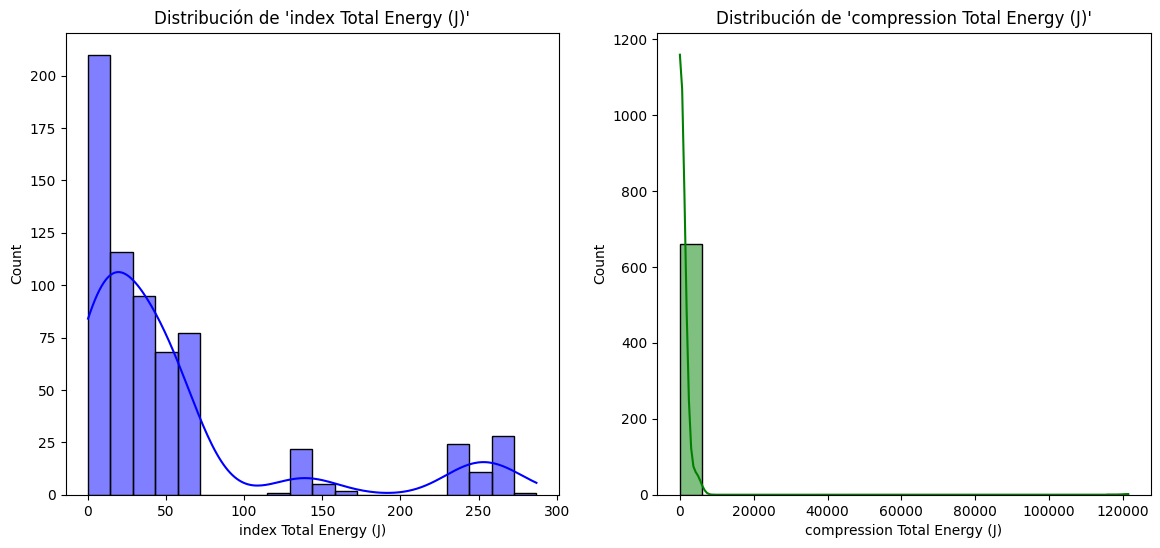

In [168]:
# Establecer el tamaño de las figuras
plt.figure(figsize=(14,6))

# Histograma para 'index Total Energy (J)'
plt.subplot(1, 2, 1)
sns.histplot(subset_clean['index Total Energy (J)'], bins=20, kde=True, color='blue')
plt.title("Distribución de 'index Total Energy (J)'")

# Histograma para 'compression Total Energy (J)'
plt.subplot(1, 2, 2)
sns.histplot(subset_clean['compression Total Energy (J)'], bins=20, kde=True, color='green')
plt.title("Distribución de 'compression Total Energy (J)'")

# Mostrar los histogramas
plt.show()



# Análisis de los Histogramas:

**Distribución de index Total Energy (J):**

* Distribución sesgada a la izquierda: La mayoría de los valores de consumo energético están concentrados en valores bajos (entre 0 y 50 J), lo que indica que la indexación tiende a consumir poca energía en la mayoría de las consultas.

* Algunos valores más altos: Existen algunos valores más altos, por encima de 150 J, pero son mucho menos frecuentes.
Línea de densidad: La curva de densidad muestra una clara caída después de los primeros valores, lo que refuerza la idea de que la mayoría de los consumos son bajos.

**Distribución de compression Total Energy (J):**

* Distribución altamente asimétrica: La mayoría de los valores están concentrados muy cerca de 0 J, mientras que hay algunos valores extremadamente altos que alcanzan hasta los 120,000 J. Esto sugiere que la compresión tiene una variabilidad mucho mayor, con casos donde el consumo energético es muy elevado.
* Posibles outliers: Es probable que los valores altos representen outliers (valores atípicos) que podrían estar afectando la media de manera significativa.

**Conclusión Preliminar:**

* index Total Energy (J): La indexación consume poca energía en la mayoría de los casos, con un pequeño número de consultas que requieren más energía.
* compression Total Energy (J): La compresión tiene un consumo de energía más variado, con algunos casos extremos que inflan significativamente el rango total.

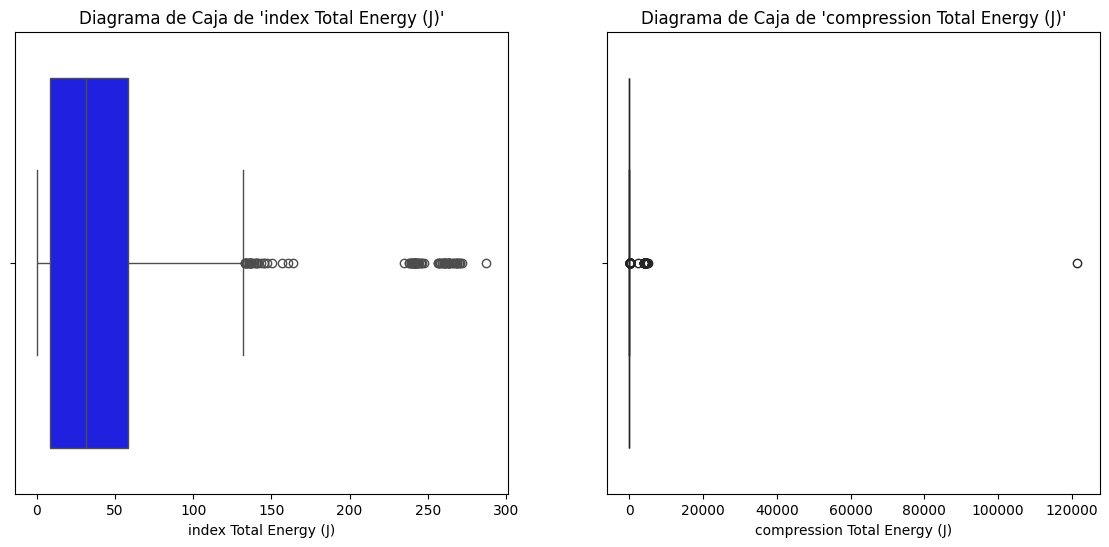

In [169]:
# Crear diagramas de caja (boxplots) para ver los outliers y la dispersión
plt.figure(figsize=(14,6))

# Diagrama de caja para 'index Total Energy (J)'
plt.subplot(1, 2, 1)
sns.boxplot(x=subset_clean['index Total Energy (J)'], color='blue')
plt.title("Diagrama de Caja de 'index Total Energy (J)'")

# Diagrama de caja para 'compression Total Energy (J)'
plt.subplot(1, 2, 2)
sns.boxplot(x=subset_clean['compression Total Energy (J)'], color='green')
plt.title("Diagrama de Caja de 'compression Total Energy (J)'")

# Mostrar los boxplots
plt.show()

# Análisis de los Diagramas de Caja:
**Diagrama de Caja para index Total Energy (J):**

* Caja estrecha: La mayor parte de los valores de index Total Energy (J) se encuentran concentrados entre 0 y 50 J, lo que confirma la baja variabilidad de los datos observada en el histograma.
* Valores atípicos (outliers): Hay una serie de valores fuera del rango intercuartil (los círculos fuera de la caja), con valores que alcanzan hasta 300 J. Estos outliers indican que algunas consultas bajo indexación consumen significativamente más energía que la mayoría.
* Asimetría: La posición de la mediana (línea dentro de la caja) hacia el extremo inferior de la caja sugiere que los datos están sesgados hacia valores más bajos.

**Diagrama de Caja para compression Total Energy (J):**

* Caja extremadamente estrecha: La mayor parte de los valores están muy cerca de 0, lo que confirma que la mayoría de las consultas consumen poca energía bajo compresión.
* Valores atípicos extremos: Hay un outlier extremo que llega a casi 120,000 J, lo cual es un caso fuera de lo común. Este outlier parece estar influyendo fuertemente en la dispersión de los datos y probablemente está afectando la media.
* Dispersión vertical larga: El hecho de que la "caja" sea tan pequeña y que haya un rango tan amplio hacia el máximo sugiere que la mayoría de las consultas no consumen mucha energía, pero un pequeño número de consultas consume mucho más.

**Conclusión de los Diagramas de Caja:**

* index Total Energy (J) tiene un comportamiento más consistente, con la mayoría de los datos concentrados en un rango bajo y algunos outliers que representan casos más extremos.
* compression Total Energy (J) está muy influenciada por algunos valores atípicos extremos. La mayoría de los datos están muy cercanos a 0, pero algunos casos outliers están distorsionando la visualización y la media.

# Análisis Univariado Dataset Cliente

Para hacer este analisis se utilizaran las variables '--base Juliet Java Total Energy (J)' y 'index Juliet Java Total Energy (J)'.
Se obtendran las medidas de tendencia central y de dispersion.
Se hara un analisis de los datos y se revisara si hay que hacer cambios en el dataset para tener una lectura mas clara de estos.

In [170]:
#Cálculo de las medidas de tendencia central y las dispersioón para '--base Juliet Java Total Energy (J)'
print("Medidas de tendencia central y dispersión para '--base Juliet Java Total Energy (J)':")
print(f"Media: {client_data['--base Juliet Java Total Energy (J)'].mean()}")
print(f"Mediana: {client_data['--base Juliet Java Total Energy (J)'].median()}")
print(f"Desviación Estándar: {client_data['--base Juliet Java Total Energy (J)'].std()}")
print(f"Varianza: {client_data['--base Juliet Java Total Energy (J)'].var()}")
print(f"Rango: {client_data['--base Juliet Java Total Energy (J)'].max() - client_data['index Juliet Java Total Energy (J)'].min()}")
print(f"Mínimo: {client_data['--base Juliet Java Total Energy (J)'].min()}")
print(f"Máximo: {client_data['--base Juliet Java Total Energy (J)'].max()}\n")


#Cálculo de las medidas de tendencia central y las dispersioón para 'index Juliet Java Total Energy (J)'
print("Medidas de tendencia central y dispersión para 'index Juliet Java Total Energy (J)':")
print(f"Media: {client_data['index Juliet Java Total Energy (J)'].mean()}")
print(f"Mediana: {client_data['index Juliet Java Total Energy (J)'].median()}")
print(f"Desviación Estándar: {client_data['index Juliet Java Total Energy (J)'].std()}")
print(f"Varianza: {client_data['index Juliet Java Total Energy (J)'].var()}")
print(f"Rango: {client_data['index Juliet Java Total Energy (J)'].max() - client_data['index Juliet Java Total Energy (J)'].min()}")
print(f"Mínimo: {client_data['index Juliet Java Total Energy (J)'].min()}")
print(f"Máximo: {client_data['index Juliet Java Total Energy (J)'].max()}\n")

Medidas de tendencia central y dispersión para '--base Juliet Java Total Energy (J)':
Media: 15.252840909090912
Mediana: 19.980600000000003
Desviación Estándar: 215.30428559265695
Varianza: 46355.93539456439
Rango: 121.8338
Mínimo: -4916.65
Máximo: 134.066

Medidas de tendencia central y dispersión para 'index Juliet Java Total Energy (J)':
Media: 18.584343030303028
Mediana: 18.30825
Desviación Estándar: 2.964932688163139
Varianza: 8.790825845338299
Rango: 17.552999999999997
Mínimo: 12.2322
Máximo: 29.7852



In [171]:
print("Valores faltantes en el dataset del cliente:")
print(client_data.isnull().sum().sum())

Valores faltantes en el dataset del cliente:
0


No hay datos nulos.
Como podemmos observar, en la variable '-- base Juliet Java Total Energy (J)' hay valores negativos y muy altos. Para tratar estos datos, ya que no se pueden eliminar al pertenecer todos a la query 22, se imputaran los datos para hacer mas clara la lectura de los datos.
Para hacer esto se cambiara todos los datos de la variable '--base Juliet Java Total Energy (j)' por la mediana de la query completa.

In [172]:
#Se immputan los datos de la query 22
baseJ_noneg=client_data.copy()
mediana = baseJ_noneg[baseJ_noneg['query'] == 22]['--base Juliet Java Total Energy (J)'].median()
baseJ_noneg.loc[(baseJ_noneg['query'] == 22) , '--base Juliet Java Total Energy (J)'] = mediana

In [173]:
#Se crea un subconjunto limpio con las variables a revisar
subset_clean_C= baseJ_noneg[['--base Juliet Java Total Energy (J)','index Juliet Java Total Energy (J)']]

In [174]:
#Cálculo de las medidas de tendencia central y las dispersioón para '--base Juliet Java Total Energy (J)'
print("Medidas de tendencia central y dispersión para '--base Juliet Java Total Energy (J)':")
print(f"Media: {subset_clean_C['--base Juliet Java Total Energy (J)'].mean()}")
print(f"Mediana: {subset_clean_C['--base Juliet Java Total Energy (J)'].median()}")
print(f"Desviación Estándar: {subset_clean_C['--base Juliet Java Total Energy (J)'].std()}")
print(f"Varianza: {subset_clean_C['--base Juliet Java Total Energy (J)'].var()}")
print(f"Rango: {subset_clean_C['--base Juliet Java Total Energy (J)'].max() - client_data['index Juliet Java Total Energy (J)'].min()}")
print(f"Mínimo: {subset_clean_C['--base Juliet Java Total Energy (J)'].min()}")
print(f"Máximo: {subset_clean_C['--base Juliet Java Total Energy (J)'].max()}\n")


#Cálculo de las medidas de tendencia central y las dispersioón para 'index Juliet Java Total Energy (J)'
print("Medidas de tendencia central y dispersión para 'index Juliet Java Total Energy (J)':")
print(f"Media: {subset_clean_C['index Juliet Java Total Energy (J)'].mean()}")
print(f"Mediana: {subset_clean_C['index Juliet Java Total Energy (J)'].median()}")
print(f"Desviación Estándar: {subset_clean_C['index Juliet Java Total Energy (J)'].std()}")
print(f"Varianza: {subset_clean_C['index Juliet Java Total Energy (J)'].var()}")
print(f"Rango: {subset_clean_C['index Juliet Java Total Energy (J)'].max() - client_data['index Juliet Java Total Energy (J)'].min()}")
print(f"Mínimo: {subset_clean_C['index Juliet Java Total Energy (J)'].min()}")
print(f"Máximo: {subset_clean_C['index Juliet Java Total Energy (J)'].max()}\n")

Medidas de tendencia central y dispersión para '--base Juliet Java Total Energy (J)':
Media: 26.581195454545455
Mediana: 20.0124
Desviación Estándar: 20.924779489755217
Varianza: 437.84639669488064
Rango: 104.38629999999999
Mínimo: 12.8693
Máximo: 116.6185

Medidas de tendencia central y dispersión para 'index Juliet Java Total Energy (J)':
Media: 18.584343030303028
Mediana: 18.30825
Desviación Estándar: 2.964932688163139
Varianza: 8.790825845338299
Rango: 17.552999999999997
Mínimo: 12.2322
Máximo: 29.7852



In [175]:
subset_clean_C.describe()

,--base Juliet Java Total Energy (J),index Juliet Java Total Energy (J)
count,660.000000,660.000000
mean,26.581195,18.584343
std,20.924779,2.964933
min,12.869300,12.232200
25%,18.205800,16.371525
50%,20.012400,18.308250
75%,24.095825,20.555300
max,116.618500,29.785200


# Comparación de los Resultados:
**Media:**
*   --base Juliet Java Total Energy (J): 26.58 J
*   index Juliet Java Total Energy (J): 18.58 J

La --base tiene una media de consumo de energía significativamente mayor que la indexación.

**Mediana:**

*   --base Juliet Java Total Energy (J): 20.01 J
*   index Juliet Java Total Energy (J): 18.30 J

Similar a la media, la --base tiene una mediana más alta, lo que indica un mayor consumo en la mayoría de los casos.

**Desviación Estándar y Varianza:**


*   --base Juliet Java Total Energy (J): Desviación Estándar 20.92 J, Varianza 437.84 J²
*   index Juliet Java Total Energy (J): Desviación Estándar 2.96 J, Varianza 8.79 J²

Aquí vemos que los valores de --base están mucho más dispersos. Esto sugiere que el consumo de energía --base varía bastante, mientras que el consumo con indexación es más consistente.

**Rango:**

* --base Juliet Java Total Energy (J): 108.50 J
* index Juliet Java Total Energy (J): 21.66 J

El rango de --base es mucho mas amplio, lo que puede indicar que tiene valores mas extremos.

**Mínimo y Máximo:**

* --base Juliet Java Total Energy (J): Mínimo 12.86 J, Máximo 116.61 J
* index Juliet Java Total Energy (J): Mínimo 12.23 J, Máximo 29.78 J

Aunque ambos conjuntos de datos tienen valores mínimos parecidos, el máximo en la --base es significativamente mayor, lo que indica la presencia de algunos outliers o casos donde el consumo energético fue extremadamente alto.


**Conclusiones de la Comparación:**

* El consumo de energia en --base es mayor en promedio a index, lo que varia mas en funcion de la query que se esta consultando.

* El consumo con indexación es más bajo y más constante, lo que lo convierte en una estrategia de optimización más predecible en términos de consumo energético.

* La varianza y la desviación estándar de --base son mucho más altas, lo que sugiere ciertas consultas estan consumiendo mas energia en comparacion con la indexacion.
* El rango en --base es mucho mas amplio, lo que indica que hay valores extremos que estan subiendo la media de los datos.

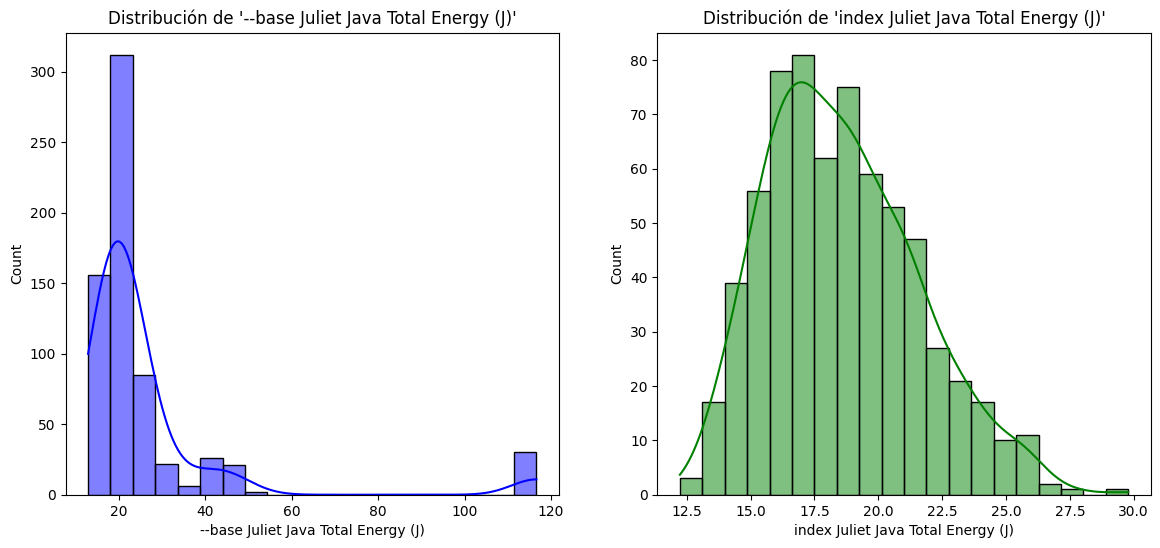

In [176]:
# Establecer el tamaño de las figuras
plt.figure(figsize=(14,6))

# Histograma para 'index Juliet Java Total Energy (J)'
plt.subplot(1, 2, 1)
sns.histplot(subset_clean_C['--base Juliet Java Total Energy (J)'], bins=20, kde=True, color='blue')
plt.title("Distribución de '--base Juliet Java Total Energy (J)'")

# Histograma para '--base Juliet Java Total Energy (J)'
plt.subplot(1, 2, 2)
sns.histplot(subset_clean_C['index Juliet Java Total Energy (J)'], bins=20, kde=True, color='green')
plt.title("Distribución de 'index Juliet Java Total Energy (J)'")

# Mostrar los histogramas
plt.show()

In [177]:
client_data['query'][client_data['--base Juliet Java Total Energy (J)']>100]

,query
630,22
631,22
633,22
634,22
635,22
636,22
637,22
638,22
639,22
640,22


# Analisis de los Histogramas
**Distribucion de --base Juliet Java Total Energy (j):**

* Distribucion marcada a la izquierda: La gran parte de los datos estan concentrados en valores mas bajos, entre 0 y 50 aproximadamente.
* Algunos valores mas altos: Existen valores superior a los 100(J), al hacer un analisis pudimos corroborar que son los datos de la consulta 22, la cual parece que tiene un mayor consumo de energia que las otras consultas.

**Distribucion de index Juliet Java Total Energy(J):**

* Distribucion mas centralizada: Segun podemos ver en el grafico, los datos se agrupan de una forma parecida a la distribucion normal, por lo que ciertas tecnicas estadisticas como las pruebas parametricas y otras.

**Conclusion Preliminar**

* --base Juliet Java Total Energy (J): --base consume baja energia en la mayoria de los casos, excepto la consulta 22 que gasta mucha mas energia.
* index Juliet Java Total Energy (J): index tiene un  consumo de energia mas variado pero todas las consultas estan cercanas a las medidas de tendencias central.

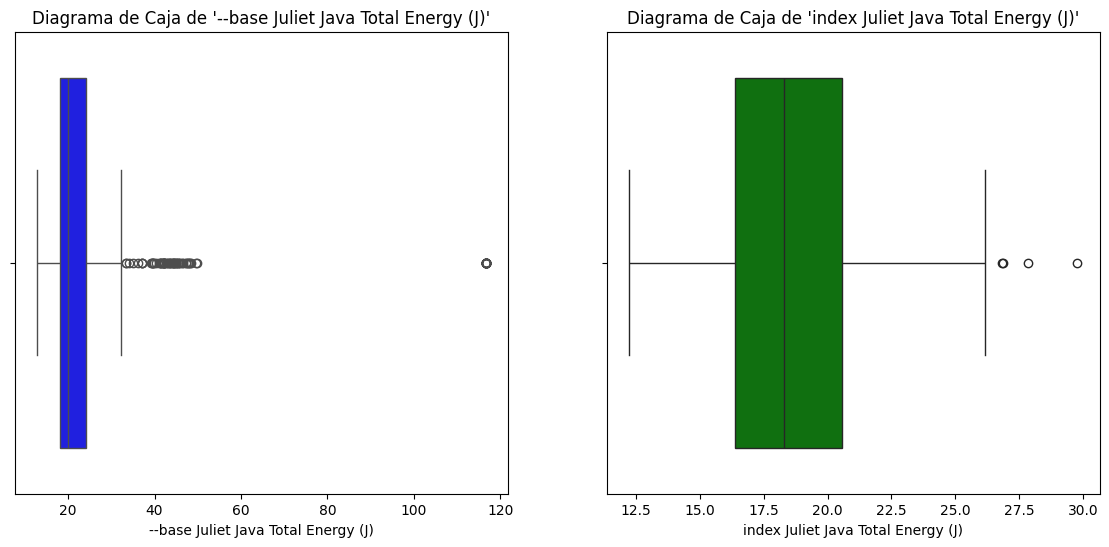

In [178]:
# Crear diagramas de caja (boxplots) para ver los outliers y la dispersión
plt.figure(figsize=(14,6))

# Diagrama de caja para 'index Juliet Java Total Energy (J)'
plt.subplot(1, 2, 1)
sns.boxplot(x=subset_clean_C['--base Juliet Java Total Energy (J)'], color='blue')
plt.title("Diagrama de Caja de '--base Juliet Java Total Energy (J)'")

# Diagrama de caja para '--base Juliet Java Total Energy (J)'
plt.subplot(1, 2, 2)
sns.boxplot(x=subset_clean_C['index Juliet Java Total Energy (J)'], color='green')
plt.title("Diagrama de Caja de 'index Juliet Java Total Energy (J)'")

# Mostrar los boxplots
plt.show()

#Analisis de los Diagramas de Cajas
**Diagrama de caja para --base Juliet Java Total Energy (J):**

* La mayoria de los valores se encuentran concentrados entre el 0 y el 20 J, esto confirma que los datos se mantienen mayoritariamente dentro de un rango pequeño observados en el histograma.

* Hay valores outliers que estan fuera del rango intercuartil, estos valores altos corresponden al consumo de la consulta 22, los cuales son mucho mas altos que las otras consultas.

* La posicion de la mediana hacia el extremo indferior de la caja indicaria que los datos estan mas agrupados hacia valores mas bajos.

**Diagrama de caja para index Juliet Java Total Energy (J):**

* Caja no tan estrecha, lo que indica que una mayor cantidad de datos se encuentran entre el 50% central de los datos.

* Pocos valores outliers: Que haya pocos outliers indica que la mayoria de los datos sigue una tendencia central y no hay muchos valores extremadamente altos en relacion al resto de los datos.

* La meiana esta ligeramente desplazada a hacia los valores mas bajos, lo que implica que existe una ligera asimetria en la distribucion.

**Conclusion de los Diagramas de Cajas**

* --base Juliet Java Total Energy(J) tiene los valores mayoritariamente agrupado a valores bajos de energia (J), pero tiene valores outliers altos que pueden distorsionar las medidas de tendencia central.
* index Juliet Java Total Energy (J) tiene una distribucion que podria describirse como moderadamente dispersa, sin muchos valores atipicos y con un ligero sesgo a los valores mas altos.

# Análisis Bivariado Dataset Servidor

# Hipótesis:

* "Las estrategias de optimización de compresión e indexación están relacionadas de manera directa en términos de consumo de energía. A mayor consumo de energía en indexación, mayor será el consumo de energía en compresión."

In [179]:
# Cálculo del coeficiente de correlación de Pearson
correlation, p_value = pearsonr(index_energy, compression_energy)
print(f"Coeficiente de correlación de Pearson: {correlation}")
print(f"Valor p: {p_value}")

Coeficiente de correlación de Pearson: 0.015786116588901066
Valor p: 0.6856178093994162


En el siguiente fragmento de código, se realiza la normalización de las variables index Total Energy (J) y compression Total Energy (J) utilizando el método z-score, mediante la función StandardScaler() de sklearn. La normalización z-score ajusta los valores de ambas variables para que tengan una media de 0 y una desviación estándar de 1, lo que permite comparar las variables en una escala común, eliminando el efecto de las diferencias de magnitud entre ellas.

Tras la normalización, se calcula el coeficiente de correlación de Pearson para determinar si existe una relación lineal significativa entre las dos variables escaladas. Este coeficiente mide la fuerza y dirección de la relación entre las variables, con valores entre -1 (relación negativa perfecta) y 1 (relación positiva perfecta).

Finalmente, se genera un gráfico de dispersión que visualiza la relación entre index Total Energy (J) y compression Total Energy (J) en su forma normalizada, facilitando la observación de cualquier posible tendencia lineal entre las dos variables.

   index Total Energy (J)  compression Total Energy (J)
0                0.853761                     -0.026033
1                1.269247                     -0.029044
2                1.098858                     -0.027393
3                1.333125                     -0.029156
4                1.101456                     -0.025849
Coeficiente de correlación de Pearson (normalizado): -0.04076755352159718
Valor p: 0.295659441083603


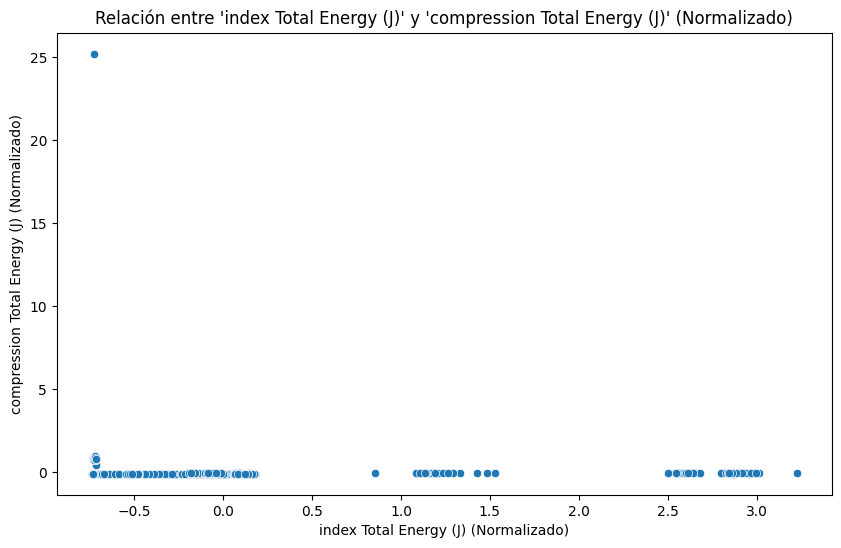

In [180]:
# Crear el objeto scaler
scaler = StandardScaler()

# Normalizamos las variables
server_data[['index Total Energy (J)', 'compression Total Energy (J)']] = scaler.fit_transform(
    server_data[['index Total Energy (J)', 'compression Total Energy (J)']])

# Revisar las primeras filas después de la normalización
print(server_data[['index Total Energy (J)', 'compression Total Energy (J)']].head())

# Repetimos el cálculo de Pearson y el gráfico
index_energy = server_data['index Total Energy (J)']
compression_energy = server_data['compression Total Energy (J)']

# Cálculo del coeficiente de correlación de Pearson después de la normalización
correlation, p_value = pearsonr(index_energy, compression_energy)
print(f"Coeficiente de correlación de Pearson (normalizado): {correlation}")
print(f"Valor p: {p_value}")

# Visualización con un gráfico de dispersión después de la normalización
plt.figure(figsize=(10, 6))
sns.scatterplot(x=index_energy, y=compression_energy)
plt.title("Relación entre 'index Total Energy (J)' y 'compression Total Energy (J)' (Normalizado)")
plt.xlabel("index Total Energy (J) (Normalizado)")
plt.ylabel("compression Total Energy (J) (Normalizado)")
plt.show()

Debido a que existe un valor que excede por mucho a los demás (outliner), debemos tratarl, para ello se tomó la decisión de eliminarlo para poder realizar un análisis más correcto

In [181]:
# Definir un límite superior razonable para la variable 'compression Total Energy (J)'
limite_superior = 100000  # El límite puede ajustarse según sea necesario

# Filtrar el subconjunto limpio para eliminar el outlier
subset_clean_filtered = subset_clean[subset_clean['compression Total Energy (J)'] < limite_superior]

# Verificación del subconjunto después de eliminar el outlier
print("Descripción del subconjunto limpio sin outliers:")
print(subset_clean_filtered.describe())

Descripción del subconjunto limpio sin outliers:
       index Total Energy (J)  compression Total Energy (J)
count              659.000000                    659.000000
mean                53.656675                    268.781887
std                 72.468793                    896.036142
min                  0.293771                      1.950100
25%                  8.237425                     28.815650
50%                 31.213300                     53.117600
75%                 58.175500                     63.386450
max                286.985000                   5182.530000


Coeficiente de correlación de Pearson (sin outlier): -0.07021282880613369
Valor p (sin outlier): 0.07166588506677474


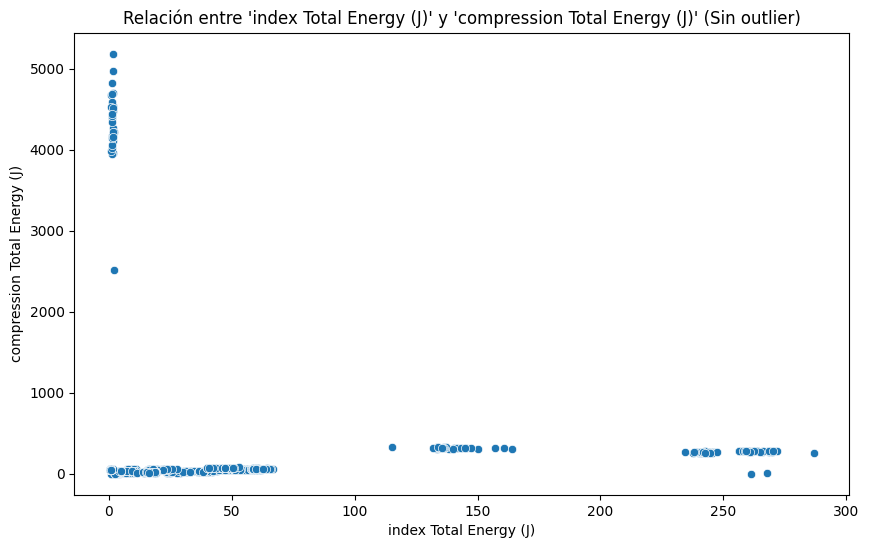

In [182]:
# Definir las variables del subconjunto limpio sin el outlier
index_energy_clean = subset_clean_filtered['index Total Energy (J)']
compression_energy_clean = subset_clean_filtered['compression Total Energy (J)']

# Cálculo del coeficiente de correlación de Pearson en el subconjunto limpio
correlation_clean, p_value_clean = pearsonr(index_energy_clean, compression_energy_clean)
print(f"Coeficiente de correlación de Pearson (sin outlier): {correlation_clean}")
print(f"Valor p (sin outlier): {p_value_clean}")

# Visualización con un gráfico de dispersión después de eliminar el outlier
plt.figure(figsize=(10, 6))
sns.scatterplot(x=index_energy_clean, y=compression_energy_clean)
plt.title("Relación entre 'index Total Energy (J)' y 'compression Total Energy (J)' (Sin outlier)")
plt.xlabel("index Total Energy (J)")
plt.ylabel("compression Total Energy (J)")
plt.show()

# Análisis de los Resultados:

**Coeficiente de Correlación de Pearson:**

* Valor de Pearson: -0.07 (aproximadamente).
* Valor p: 0.07.

Esto indica que no hay una correlación lineal significativa entre el consumo de energía en la indexación y la compresión. El valor de Pearson cercano a 0 sugiere que no hay una relación fuerte entre estas dos variables.

**Gráfico de Dispersión:**

* La mayoría de los puntos están concentrados en la parte inferior del gráfico, con algunos valores de compression Total Energy (J) dispersos a más de 5000 J, lo que indica que la compresión es más variable, pero sin una relación clara con la indexación.

* No hay una correlación fuerte entre las variables. Esto significa que el consumo de energía en la indexación no parece influir directamente en el consumo de energía en la compresión.

* El valor p cercano a 0.07 sugiere que cualquier correlación observada es débil y no es estadísticamente significativa con un nivel de confianza del 95%.



# Regresión lineal

A persar de que la correlación es baja realizar una regresión lineal ayudará a ver si es que existe alguna tendencia general, aunque sea pequeña.

Ecuación de la regresión lineal: y = -0.8681x + 315.3635


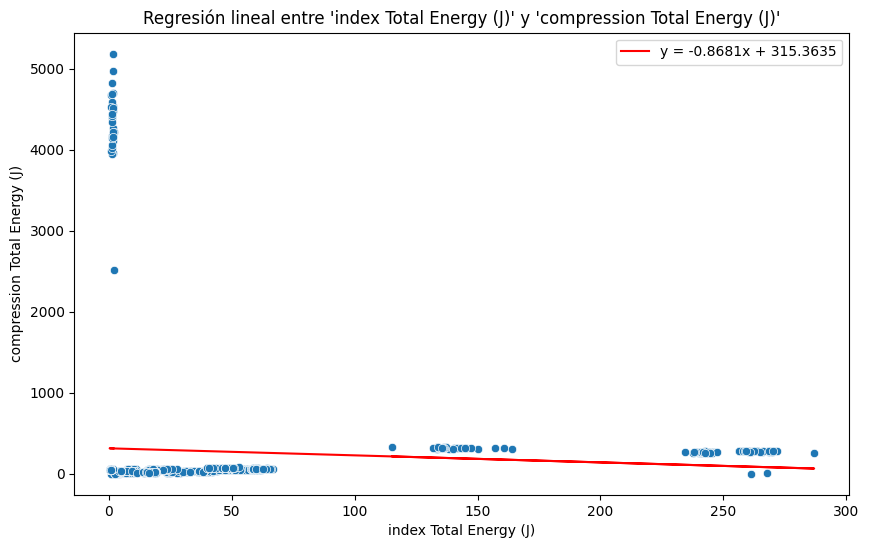

In [183]:
X = subset_clean_filtered['index Total Energy (J)'].values.reshape(-1, 1)
y = subset_clean_filtered['compression Total Energy (J)'].values.reshape(-1, 1)

# Crear el modelo de regresión lineal
reg = LinearRegression().fit(X, y)

# Obtener el coeficiente de la recta (pendiente) y la intersección
slope = reg.coef_[0]
intercept = reg.intercept_
print(f"Ecuación de la regresión lineal: y = {slope[0]:.4f}x + {intercept[0]:.4f}")

# Predicciones de la regresión para visualizar la línea ajustada
y_pred = reg.predict(X)

# Visualización del gráfico de dispersión con la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=subset_clean_filtered['index Total Energy (J)'], y=subset_clean_filtered['compression Total Energy (J)'])
plt.plot(subset_clean_filtered['index Total Energy (J)'], y_pred, color='red', label=f"y = {slope[0]:.4f}x + {intercept[0]:.4f}")
plt.title("Regresión lineal entre 'index Total Energy (J)' y 'compression Total Energy (J)'")
plt.xlabel("index Total Energy (J)")
plt.ylabel("compression Total Energy (J)")
plt.legend()
plt.show()

# Análisis de regresión lineal

la ecuación muestra una pendiente negativa, loque sugiere que a medida que aumenta el consumo en la indexación hay una ligera disminución en el consumo de compresión, pero como se a mencionado anteriormente la relación es muy débil.

Además la línea de regresión lineal es casi horizontal y no sigue ningún patrón claro en los datos, esto refuerza lo mencionado anteriormente referente a que no hay una relación significativa.

# Conclusiones

* Hipótesis: La hipótesis original de que el consumo energético en la indexación y la compresión podrían estar relacionados de manera directa no se sostiene según los resultados.

* Relación débil: Los resultados muestran una correlación muy baja, lo que implica que no hay una fuerte relación lineal entre estas dos variables.

* La regresión lineal arrojó una pendiente levemente negativa (-0.8681), pero este valor es muy pequeño y prácticamente no impacta de manera significativa. Esto sugiere que el consumo de energía en la indexación tiene una influencia mínima o nula en el consumo de energía en la compresión. La línea de regresión fue casi horizontal, lo que refuerza la ausencia de una relación clara.

* A partir de los resultados, parece que las estrategias de optimización de indexación y compresión operan de manera relativamente independiente en términos de consumo energético. No se observó una relación significativa entre ambas, lo que sugiere que los factores que influyen en el consumo de energía para cada una son distintos y no dependen mutuamente.

#Análisis Bivariado Dataset Cliente

## Hipótesis:

* "Existe una correlación significativa entre el consumo de energía sin optimización (--base Juliet Java Total Energy (J)) y el consumo de energía con optimización mediante indexación (index Juliet Java Total Energy (J)). Si el consumo energético en el estado base es alto, se espera que el consumo con optimización de indexación también sea alto; de manera similar, si hay una correlación negativa, un menor consumo en el estado base implicaría un menor consumo con la optimización de indexación."

In [184]:
# Seleccionamos las dos variables para análisis del dataset del servidor
index_energy = client_data['index Juliet Java Total Energy (J)']
base_energy = client_data['--base Juliet Java Total Energy (J)']
correlation, p_value = pearsonr(index_energy, base_energy)
print(f"Coeficiente de correlación de Pearson: {correlation}")
print(f"Valor p: {p_value}")

Coeficiente de correlación de Pearson: 0.024689615266101122
Valor p: 0.5266148819031848


   index Juliet Java Total Energy (J)  --base Juliet Java Total Energy (J)
0                            0.144179                             0.030315
1                            1.558133                             0.039172
2                            0.201998                             0.045825
3                            0.693444                             0.045453
4                            0.282229                             0.022126
Coeficiente de correlación de Pearson (normalizado): 0.02468961526610112
Valor p: 0.5266148819031848


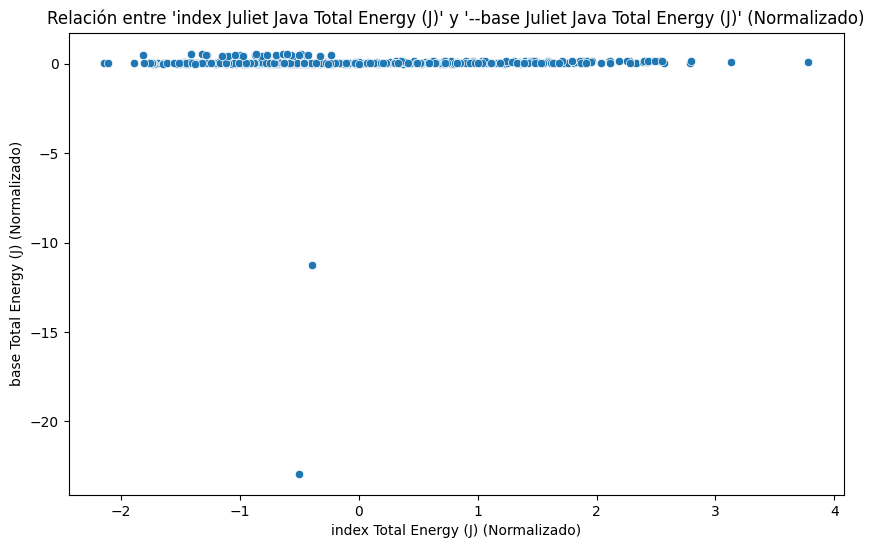

In [185]:
# Crear el objeto scaler
scaler = StandardScaler()

# Normalizamos las variables
client_data[['index Juliet Java Total Energy (J)', '--base Juliet Java Total Energy (J)']] = scaler.fit_transform(
    client_data[['index Juliet Java Total Energy (J)', '--base Juliet Java Total Energy (J)']])

# Revisar las primeras filas después de la normalización
print(client_data[['index Juliet Java Total Energy (J)', '--base Juliet Java Total Energy (J)']].head())

# Repetimos el cálculo de Pearson y el gráfico
index_energy = client_data['index Juliet Java Total Energy (J)']
base_energy = client_data['--base Juliet Java Total Energy (J)']

# Cálculo del coeficiente de correlación de Pearson después de la normalización
correlation, p_value = pearsonr(index_energy, base_energy)
print(f"Coeficiente de correlación de Pearson (normalizado): {correlation}")
print(f"Valor p: {p_value}")

# Visualización con un gráfico de dispersión después de la normalización
plt.figure(figsize=(10, 6))
sns.scatterplot(x=index_energy, y=base_energy)
plt.title("Relación entre 'index Juliet Java Total Energy (J)' y '--base Juliet Java Total Energy (J)' (Normalizado)")
plt.xlabel("index Total Energy (J) (Normalizado)")
plt.ylabel("base Total Energy (J) (Normalizado)")
plt.show()

Debido a que existe un valor que excede por mucho a los demás (outliner), debemos tratarlo, para ello se tomó la decisión de eliminarlo para poder realizar un análisis más correcto

In [186]:
# Definir un límite superior razonable para la variable '--base Juliet Java Total Energy (J)'
limite_superior = 100000  # El límite puede ajustarse según sea necesario

# Filtrar el subconjunto limpio para eliminar el outlier
subset_clean_filtered_C = subset_clean_C[subset_clean_C['--base Juliet Java Total Energy (J)'] < limite_superior]

# Verificación del subconjunto después de eliminar el outlier
print("Descripción del subconjunto limpio sin outliers:")
print(subset_clean_filtered_C.describe())

Descripción del subconjunto limpio sin outliers:
       --base Juliet Java Total Energy (J)  index Juliet Java Total Energy (J)
count                           660.000000                          660.000000
mean                             26.581195                           18.584343
std                              20.924779                            2.964933
min                              12.869300                           12.232200
25%                              18.205800                           16.371525
50%                              20.012400                           18.308250
75%                              24.095825                           20.555300
max                             116.618500                           29.785200


Coeficiente de correlación de Pearson (sin outlier): 0.004151857861910832
Valor p (sin outlier): 0.9152162568314987


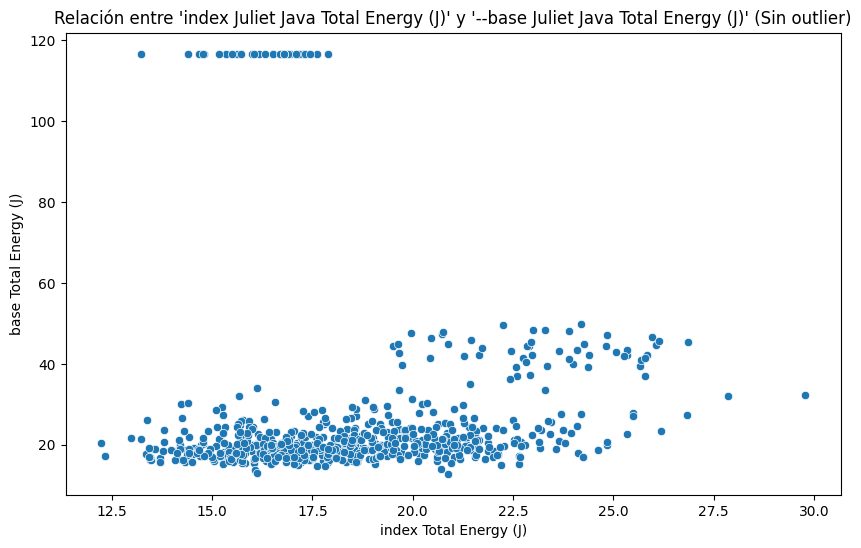

In [187]:
# Definir las variables del subconjunto limpio sin el outlier
index_energy_clean = subset_clean_filtered_C['index Juliet Java Total Energy (J)']
base_energy_clean = subset_clean_filtered_C['--base Juliet Java Total Energy (J)']

# Cálculo del coeficiente de correlación de Pearson en el subconjunto limpio
correlation_clean, p_value_clean = pearsonr(index_energy_clean, base_energy_clean)
print(f"Coeficiente de correlación de Pearson (sin outlier): {correlation_clean}")
print(f"Valor p (sin outlier): {p_value_clean}")

# Visualización con un gráfico de dispersión después de eliminar el outlier
plt.figure(figsize=(10, 6))
sns.scatterplot(x=index_energy_clean, y=base_energy_clean)
plt.title("Relación entre 'index Juliet Java Total Energy (J)' y '--base Juliet Java Total Energy (J)' (Sin outlier)")
plt.xlabel("index Total Energy (J)")
plt.ylabel("base Total Energy (J)")
plt.show()

# Analisis de los Resultados

**Coeficiente de Correlacion de Pearson**

* Valor de Pearson: 0.004(aproximadamente).

* Valor p: 0.9

El valor de Pearson cercano a cero indica que no existe una correlacion lineal significativa entre el consumo de energia entre la base y la indexacion

**Grafico de Dispercion**

* La mayoria de los puntos estan concentrados en la parte inferior del grafico, con algunos valores de base Juliet Java Total Energy (J) superior a 100. Esto indica que los valores de base son mas variables, pero no tienen una relacion clara con indexacion.

* Como se puede apreciar, no hay una correlacion fuerte, por lo que parece indicar que un consumo mayor de energia en base no influye directamente con el consumo de indexacion.

* Un valor p de 0.9 sugiere que la relacion entre variables es debil, por lo que no hay evidencia de un efecto significativo.

Ecuación de la regresión lineal: y = 0.0293x + 26.0366


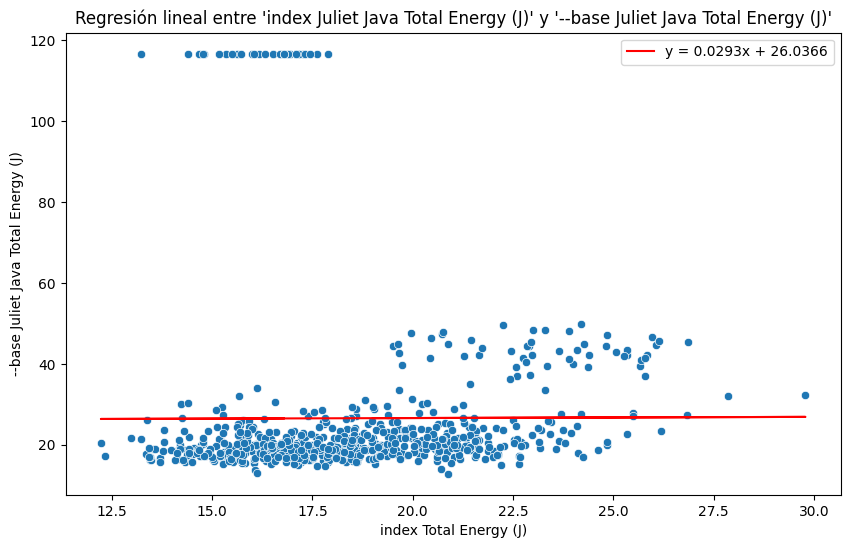

In [188]:
X = subset_clean_filtered_C['index Juliet Java Total Energy (J)'].values.reshape(-1, 1)
y = subset_clean_filtered_C['--base Juliet Java Total Energy (J)'].values.reshape(-1, 1)

# Crear el modelo de regresión lineal
reg = LinearRegression().fit(X, y)

# Obtener el coeficiente de la recta (pendiente) y la intersección
slope = reg.coef_[0]
intercept = reg.intercept_
print(f"Ecuación de la regresión lineal: y = {slope[0]:.4f}x + {intercept[0]:.4f}")

# Predicciones de la regresión para visualizar la línea ajustada
y_pred = reg.predict(X)

# Visualización del gráfico de dispersión con la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=subset_clean_filtered_C['index Juliet Java Total Energy (J)'], y=subset_clean_filtered_C['--base Juliet Java Total Energy (J)'])
plt.plot(subset_clean_filtered_C['index Juliet Java Total Energy (J)'], y_pred, color='red', label=f"y = {slope[0]:.4f}x + {intercept[0]:.4f}")
plt.title("Regresión lineal entre 'index Juliet Java Total Energy (J)' y '--base Juliet Java Total Energy (J)'")
plt.xlabel("index Total Energy (J)")
plt.ylabel("--base Juliet Java Total Energy (J)")
plt.legend()
plt.show()

# Análisis de regresión lineal

La ecuación muestra una pendiente ligeramente positiva, lo que sugiere que a medida que aumenta el consumo en la indexación hay un ligero aumento en el consumo energetico de la base, pero como se ha mencionado anteriormente la relación es muy débil.

Además la línea de regresión lineal es casi horizontal y no sigue ningún patrón claro en los datos, esto refuerza lo mencionado anteriormente referente a que no hay una relación significativa.

# Conclusiones

* Hipótesis: La hipótesis original de que el consumo energético en la indexación y la base podrían estar relacionados de manera directa no se sostiene según los resultados.

* Relación débil: Los resultados muestran una correlación muy baja, lo que implica que no hay una fuerte relación lineal entre estas dos variables.

* La regresión lineal arrojó una pendiente levemente positiva (0.0293), pero este valor es muy pequeño y prácticamente no impacta de manera significativa. Esto sugiere que el consumo de energía en la indexación tiene una influencia mínima o nula en el consumo de energía en la base. La línea de regresión fue casi horizontal, lo que refuerza la ausencia de una relación clara.

* A partir de los resultados, parece que las estrategias de optimización de indexación y base operan de manera relativamente independiente en términos de consumo energético. No se observó una relación significativa entre ambas, lo que sugiere que los factores que influyen en el consumo de energía para cada una son distintos y no dependen mutuamente.

# Análisis Multivariado Dataset Servidor

**Hipótesis:**
* Las estrategias de optimización (indexación, compresión, y su combinación) tienen un impacto significativo en la energía total consumida. Específicamente, la combinación de ambas estrategias debería reducir el consumo energético más que si se aplican individualmente.


El análisis multivariado se centrará en la relación entre la variable objetivo index-and-compression Total Energy (J) (energía total consumida al aplicar tanto indexación como compresión) y tres variables explicativas:

* base Total Energy (J): Energía total sin optimización, utilizada como referencia.
* index Total Energy (J): Energía total consumida solo aplicando la indexación.
* compression Total Energy (J): Energía total consumida solo aplicando la compresión.

Se utilizará un modelo de regresión múltiple para estudiar el impacto combinado de estas tres variables sobre la variable dependiente.

# Tratamiento previo de los datos para aplicar el modelo de regresión multiple

**Eliminar outliers utilizando el rango intercuartílico (IQR):**

* Primero, se define una función para eliminar los outliers o valores atípicos usando el método del rango intercuartílico (IQR).
* Este método calcula los cuartiles 1 (Q1) y 3 (Q3) de las columnas especificadas y luego determina el rango intercuartílico (IQR = Q3 - Q1). Se elimina cualquier fila que contenga valores que se encuentren fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], ya que se consideran outliers.

* Después de eliminar los outliers, se normalizan las variables de interés utilizando StandardScaler, que transforma los datos para que tengan media 0 y desviación estándar 1.

**Calcular el VIF (Factor de Inflación de la Varianza):**

* El VIF (Variance Inflation Factor) es una medida que detecta la multicolinealidad entre las variables independientes del modelo de regresión. Un alto valor de VIF indica que una variable está altamente correlacionada con otras variables, lo que podría sesgar los resultados de la regresión.

In [189]:
# Función para eliminar outliers usando el rango intercuartílico (IQR)
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

# Eliminar outliers
server_data_clean = remove_outliers(server_data, ['--base Total Energy (J)', 'index Total Energy (J)', 'compression Total Energy (J)', 'index-and-compression Total Energy (J)'])

# Normalizar las variables
scaler = StandardScaler()
server_data_clean.loc[:, ['--base Total Energy (J)', 'index Total Energy (J)', 'compression Total Energy (J)', 'index-and-compression Total Energy (J)']] = scaler.fit_transform(
    server_data_clean[['--base Total Energy (J)', 'index Total Energy (J)', 'compression Total Energy (J)', 'index-and-compression Total Energy (J)']]
)

# Calcular el VIF para detectar multicolinealidad
X_vif = server_data_clean[['--base Total Energy (J)', 'index Total Energy (J)', 'compression Total Energy (J)']]
X_vif = sm.add_constant(X_vif)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Mostrar el VIF
print(vif_data)

                       Variable        VIF
0                         const   1.000000
1       --base Total Energy (J)  12.122581
2        index Total Energy (J)   1.450486
3  compression Total Energy (J)  12.405610


**Ajuste del modelo de regresión después del tratamiento:**

* Se ajusta un modelo de regresión lineal múltiple usando las variables independientes tratadas (sin outliers y normalizadas) para predecir la variable dependiente index-and-compression Total Energy (J).

In [190]:
# ajuste despues del tratamiento
X_clean = server_data_clean[['--base Total Energy (J)', 'index Total Energy (J)', 'compression Total Energy (J)']]
y_clean = server_data_clean['index-and-compression Total Energy (J)']
X_clean = sm.add_constant(X_clean)
modelo_clean = sm.OLS(y_clean, X_clean).fit()

# Mostrar el resumen del modelo ajustado
print(modelo_clean.summary())

                                      OLS Regression Results                                      
Dep. Variable:     index-and-compression Total Energy (J)   R-squared:                       0.879
Model:                                                OLS   Adj. R-squared:                  0.879
Method:                                     Least Squares   F-statistic:                     1287.
Date:                                    Sat, 14 Sep 2024   Prob (F-statistic):          8.17e-243
Time:                                            00:05:59   Log-Likelihood:                -193.21
No. Observations:                                     534   AIC:                             394.4
Df Residuals:                                         530   BIC:                             411.5
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          

# Resumen del Análisis multivariado

* R-squared (R²): 0.879. Esto indica que el modelo puede explicar el 87.9% de la variabilidad en la energía total consumida cuando se aplican indexación y compresión simultáneamente.

**Coeficientes:**

* base Total Energy (J): El coeficiente es negativo (-0.0886), pero no es estadísticamente significativo (P-valor de 0.092).
* index Total Energy (J): El coeficiente es positivo (0.8939) y altamente significativo (P-valor de 0.000).
* compression Total Energy (J): El coeficiente también es positivo (0.1605) y significativo (P-valor de 0.003).

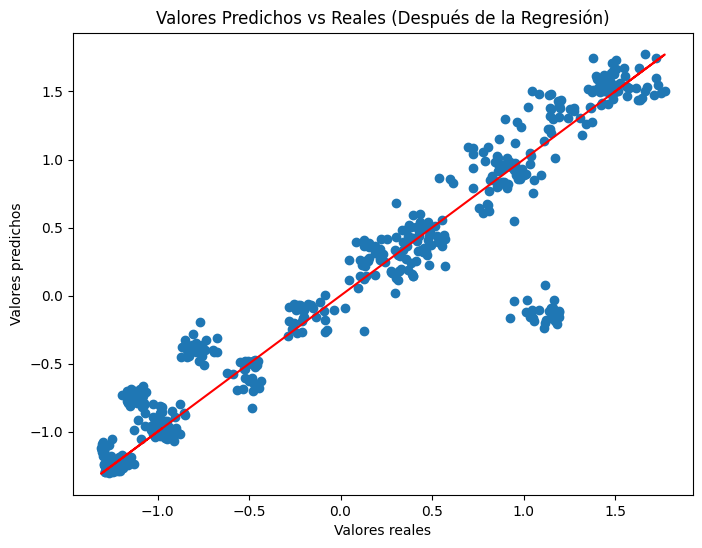

In [191]:
# Gráfico de dispersión de valores predichos vs observados
plt.figure(figsize=(8, 6))
plt.scatter(y_clean, modelo_clean.fittedvalues)
plt.plot(y_clean, y_clean, color='red')  # línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores Predichos vs Reales (Después de la Regresión)')
plt.show()

## Valores Predichos vs Valores Reales

Este gráfico tiene como objetivo mostrar la relación entre los valores predichos por el modelo de regresión y los valores reales observados en los datos.

Interpretación: La línea roja en el gráfico representa la línea de igualdad, lo que significa que, si todos los puntos se encuentran sobre esta línea, el modelo predice perfectamente los valores reales. En este gráfico, la mayoría de los puntos están bastante cerca de la línea roja, lo que sugiere que el modelo está prediciendo razonablemente bien.

A tomar en cuenta esos valores que se alejan de la linea roja porque esos outliners pueden ser de interés al momento de realizar un análisis con otro enfoque.

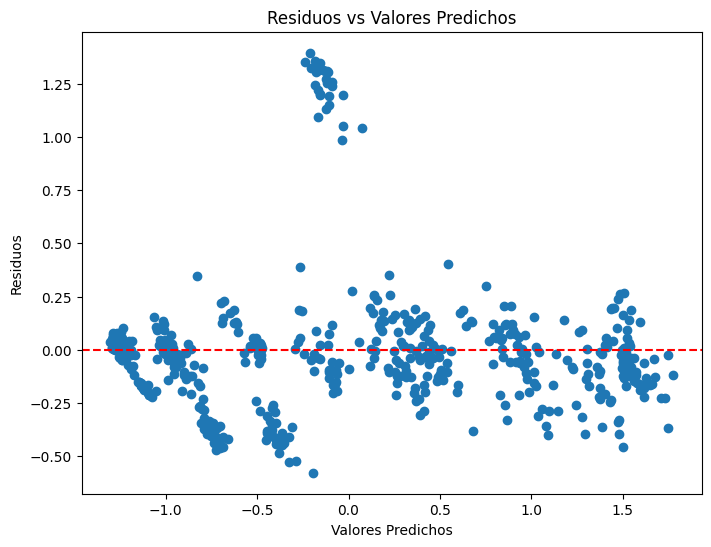

In [192]:
# Gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(modelo_clean.fittedvalues, modelo_clean.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.show()

##Residuos vs Valores Predichos
Este gráfico muestra los residuos del modelo, es decir, la diferencia entre los valores observados y los valores predichos, trazados frente a los valores predichos.

Interpretación: En este caso, observamos una distribución relativamente dispersa, pero en su mayoría los residuos están centrados cerca de cero.

Patrón en los residuos: Un comportamiento aleatorio sugiere que el modelo ha capturado bien la relación entre las variables

# Análisis Multivariado Dataset Cliente

## Tratamiento previo de los datos para aplicar el modelo de regresión múltiple

In [193]:
# Función para eliminar outliers usando el rango intercuartílico (IQR)
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

var1 = 'index Postgres Read Count'
var2 = 'index Runtime'
var3 = 'compression Runtime'
var4 = 'index-and-compression Runtime'


# Eliminar outliers
client_data_clean = remove_outliers(client_data, [var1, var2, var3, var4])

# Normalizar las variables
scaler = StandardScaler()
# Asignar los valores escalados de nuevo a las columnas, asegurando que los tipos sean float
client_data_clean = client_data_clean.assign(
    **{col: scaler.fit_transform(client_data_clean[[col]]) for col in [var1, var2, var3, var4]}
)
# a estabilidad de los coeficientes del modelo.linealidad entre las variables explicativas.
# Valores de VIF mayores a 5-10 indican alta multicolinealidad, lo cual podría afectar la estabilidad de los coeficientes del modelo.
X_vif = client_data_clean[[var1, var2, var3]]
X_vif = sm.add_constant(X_vif)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Mostrar el VIF
print(vif_data)

                    Variable       VIF
0                      const  1.000000
1  index Postgres Read Count  1.379328
2              index Runtime  2.851862
3        compression Runtime  2.349846


In [194]:
var1 = 'index Postgres Read Count'
var2 = 'index Runtime'
var3 = 'compression Runtime'
var4 = 'index-and-compression Runtime'

# ajuste despues del tratamiento
X_clean = client_data_clean[[var1, var2, var3]]
y_clean = client_data_clean[var4]
X_clean = sm.add_constant(X_clean)
modelo_clean = sm.OLS(y_clean, X_clean).fit()

# Mostrar el resumen del modelo ajustado
print(modelo_clean.summary())

                                  OLS Regression Results                                 
Dep. Variable:     index-and-compression Runtime   R-squared:                       0.903
Model:                                       OLS   Adj. R-squared:                  0.903
Method:                            Least Squares   F-statistic:                     1656.
Date:                           Sat, 14 Sep 2024   Prob (F-statistic):          2.54e-269
Time:                                   00:05:59   Log-Likelihood:                -134.55
No. Observations:                            536   AIC:                             277.1
Df Residuals:                                532   BIC:                             294.2
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------

# Resumen del Análisis multivariado

* R-squared (R²): 0.902. Esto indica que el modelo puede explicar el 90.2% de la variabilidad en el Runtime total cuando se aplican indexación y compresión simultáneamente.
* Un (R²) alto indica que el modelo es capaz de capturar la mayoría de la variación en los datos observados.

**Coeficientes:**

* --base Runtime:       El coeficiente es positivo (0.0021) y no es significativo  (P-valor de 0.937).
* index Runtime:        El coeficiente es positivo (0.8904) y altamente significativo (P-valor de 0.000).
* compression Runtime:  El coeficiente es positivo (0.0778) y altamente significativo (P-valor de 0.006).

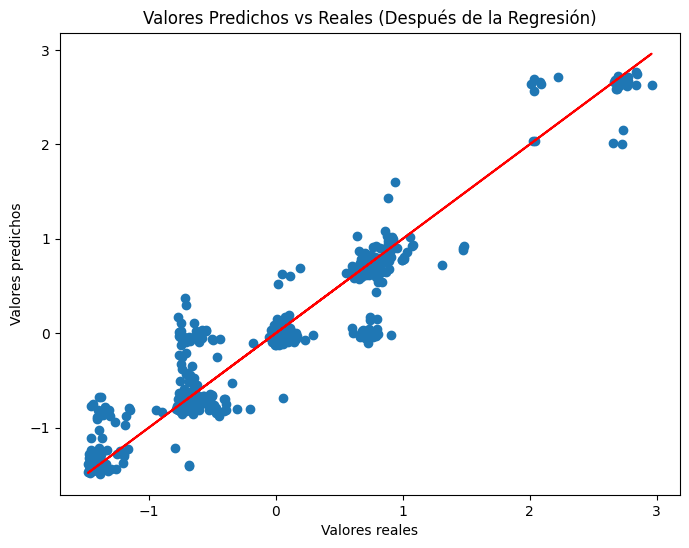

In [195]:
# Gráfico de dispersión de valores predichos vs observados
plt.figure(figsize=(8, 6))
plt.scatter(y_clean, modelo_clean.fittedvalues)
plt.plot(y_clean, y_clean, color='red')  # línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores Predichos vs Reales (Después de la Regresión)')
plt.show()

# Analisis del Grafico Valores Predichos VS Reales
* Dado que la mayoría de los puntos están alineados cerca de la línea de referencia(Linea roja), esto sugiere que el modelo de regresión múltiple predice bien los valores de la variable dependiente (index-and-compression Runtime).

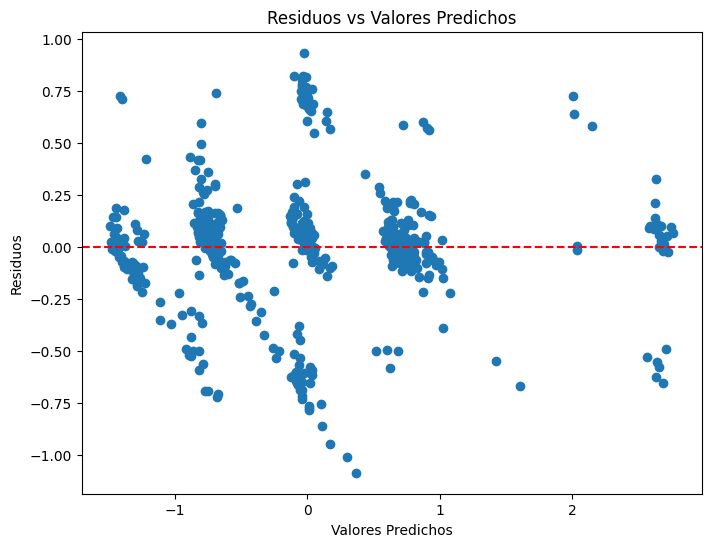

In [196]:
# Gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(modelo_clean.fittedvalues, modelo_clean.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.show()

# Gráfico de Residuos:
* El gráfico de residuos vs valores predichos muestra que los residuos (diferencias entre los valores reales y predichos) están distribuidos aleatoriamente alrededor de cero, lo que sugiere que no hay patrones sistemáticos que el modelo no haya capturado. Esto es indicativo de un buen ajuste del modelo a los datos y sugiere que las suposiciones de linealidad y homocedasticidad son razonables.

#Conclusiones Finales

Dataset del servidor:

* El análisis multivariado del dataset del servidor muestra que tanto la indexación como la compresión tienen un impacto significativo en el consumo total de energía. Sin embargo, la indexación resulta ser la estrategia de optimización más influyente, con un coeficiente mayor en el modelo de regresión, lo que sugiere que su implementación puede generar mayores ahorros de energía.
* El modelo obtenido tiene un coeficiente de determinación (R²) alto, alrededor del 0.879, lo que indica que el modelo es capaz de explicar gran parte de la variabilidad observada en el consumo de energía, lo que refuerza la validez del modelo para predecir el comportamiento del sistema cuando se aplican estas estrategias.
* Las gráficas de residuos y valores predichos sugieren que el modelo se ajusta adecuadamente a los datos, aunque es importante destacar que existen algunos valores atípicos que podrían ser estudiados en profundidad.

Dataset Cliente: